In [6]:
import pandas as pd

import numpy as np

from scipy.stats import pearsonr, linregress

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

import sqlite3

import seaborn as sns
sns.set_style("whitegrid", rc={'axes.linewidth': 2.5})
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 1, "figure.figsize" : (13,6)})

In [15]:

gdp_cols = ['gdp', 'gdpdelta', 'gdp%change']
lforce_cols = ['lforce', 'lforcedelta', 'lforce%change']
unemp_cols = ['unemp', 'unempdelta', 'unemp%change']
inflation_cols = ['inflation', 'inflationdelta', 'inflation%change']


## Trendlines for Economic Indicators
In the interest of legibility, we displayed the trendlines for a small subset of G7 countries.  

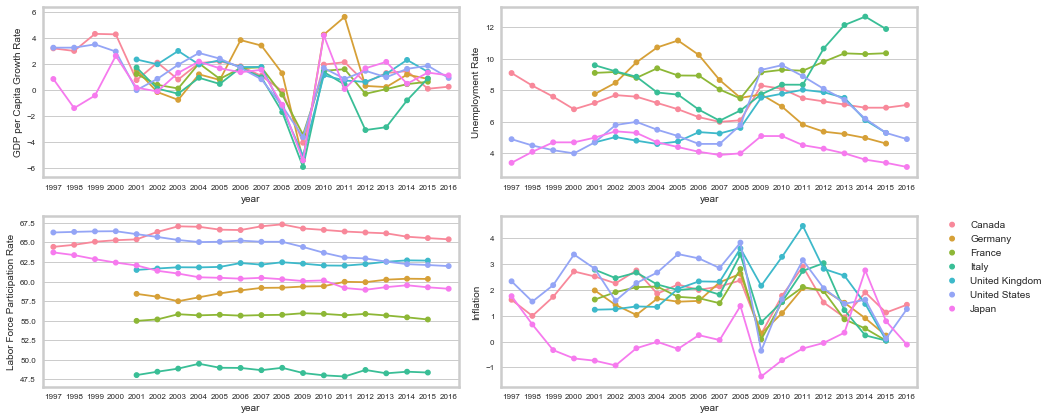

In [12]:
economic = pd.read_csv("data/clean_g7.csv", usecols = ['ctry', 'year', 'gdp', 'unemp',
                                                   'lforce', 'inflation'])

#economic = economic.loc[economic['ctry'].isin(sample)]

import matplotlib as mpl
tick_size = 8
axes_size = 10
mpl.rcParams['xtick.labelsize'] = tick_size 
mpl.rcParams['ytick.labelsize'] = tick_size 
mpl.rcParams['axes.labelsize'] = axes_size

 
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = False)


axgdp = sns.pointplot(data = economic, x="year", y = "gdp", hue="ctry",  ax=axes[0,0])
axunemp = sns.pointplot(data = economic, x="year", y = "unemp", hue="ctry",  ax=axes[0,1])
axlforce = sns.pointplot(data = economic, x="year", y = "lforce", hue="ctry", ax=axes[1,0])
axinflation = sns.pointplot(data = economic, x="year", y = "inflation", hue="ctry",  ax=axes[1,1])

axgdp.set_ylabel("GDP per Capita Growth Rate")
axunemp.set_ylabel("Unemployment Rate")
axlforce.set_ylabel("Labor Force Participation Rate")
axinflation.set_ylabel("Inflation")

axgdp.legend_.remove()
axunemp.legend_.remove()
axlforce.legend_.remove()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()


plt.tight_layout()

For most parts of it, the economic performance of the subset countries appears to move in tandem. External factors are the most likely explanation for the GDP per Capita and inflation movements after 2008 (financial crisis followed by the European crisis). Unemployment increase for Italy from 2011 until 2014 is also explained by external factors. Labor force seems to be mostly flat, slightly decreasing. 

### Trendlines for all products tariffs 
In the interest of legibility, we displayed the trendlines for G7 countries. Since all European Union Countries have the same tariffs, only Germany will be used for this analysis.

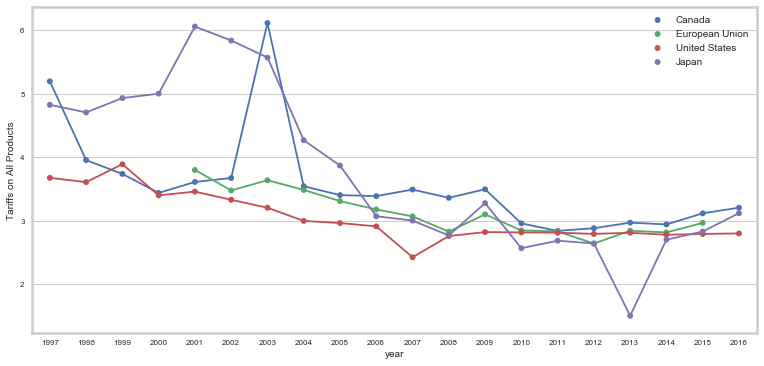

In [49]:
ap = pd.read_csv("data/clean_g7.csv", usecols = ['ctry', 'year', 'All Products_tariff'])

sample = ['Germany', 'Japan', 'United States', 'Canada']

ap = ap.loc[ap['ctry'].isin(sample)]


g = sns.pointplot(x="year", y="All Products_tariff", hue="ctry", data=ap, size=4, aspect=2)
g.set_ylabel("Tariffs on All Products")
L=plt.legend()
L.get_texts()[1].set_text('European Union')


### Trendlines for subset tariffs 


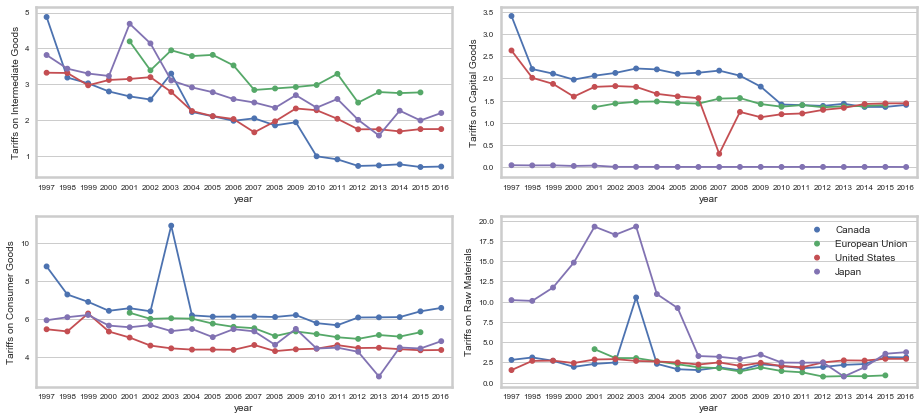

In [51]:
ig = pd.read_csv("data/clean_g7.csv", usecols = ['ctry', 'year', 'Intermediate goods_tariff', 'Capital goods_tariff',
                                                   'Consumer goods_tariff', 'Raw materials_tariff'])

ig = ig.loc[ig['ctry'].isin(sample)]


import matplotlib as mpl
tick_size = 8
axes_size = 10
mpl.rcParams['xtick.labelsize'] = tick_size 
mpl.rcParams['ytick.labelsize'] = tick_size 
mpl.rcParams['axes.labelsize'] = axes_size

 
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = False)

axig = sns.pointplot(data = ig, x="year", y = "Intermediate goods_tariff", hue="ctry",  ax=axes[0,0])
axkg = sns.pointplot(data = ig, x="year", y = "Capital goods_tariff", hue="ctry",  ax=axes[0,1])
axcg = sns.pointplot(data = ig, x="year", y = "Consumer goods_tariff", hue="ctry", ax=axes[1,0])
axrm = sns.pointplot(data = ig, x="year", y = "Raw materials_tariff", hue="ctry",  ax=axes[1,1])

axig.set_ylabel("Tariffs on Intermediate Goods")
axkg.set_ylabel("Tariffs on Capital Goods")
axcg.set_ylabel("Tariffs on Consumer Goods")
axrm.set_ylabel("Tariffs on Raw Materials")

axig.legend_.remove()
axkg.legend_.remove()
axcg.legend_.remove()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
L=plt.legend()
L.get_texts()[1].set_text('European Union')


Tariffs have mostly been declining.